## Running a Regression in Python

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*A teacher at school decided her students should take an IQ test. She prepared 5 tests she believed were aligned with the requirements of the IQ examination.
The father of one child in the class turned out to be an econometrician, so he asked her for the results of the 30 kids. The file contained the points they earned on each test and the final IQ score.*

Load the IQ_data excel file. 

In [1]:
import pandas as pd

# Load the IQ_data Excel file
_df_path = 'IQ_data.xlsx'
df = pd.read_excel(_df_path)
# Peek at the data
df.head()

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5
0,107,84,35,66,64,65
1,93,74,20,74,49,83
2,103,55,82,83,66,74
3,122,97,73,92,89,95
4,103,85,54,73,69,83


Prepare the data for a univariate regression of Test 1 based on the IQ result. Store the Test 1 scores in a variable, called X, and the IQ points in another variable, named Y. 

In [2]:
# Prepare X (Test 1 scores) and Y (IQ points)
# Adjust column names if needed by inspecting df.columns
X = df['Test 1']
Y = df['IQ']

len(X), len(Y)

(30, 30)

### Univariate Regression

In [3]:
import statsmodels.api as sm

# Add constant and fit OLS model
X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const).fit()

# Show coefficients and R-squared
model.params, model.rsquared

(const     45.882777
 Test 1     0.758723
 dtype: float64,
 0.2586400905424949)

In [4]:
# Full regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.768
Date:                Sat, 15 Nov 2025   Prob (F-statistic):            0.00411
Time:                        22:09:45   Log-Likelihood:                -134.94
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8828     16.760      2.738      0.011      11.552      80.213
Test 1         0.7587      0.243      3.125      0.004       0.261       1.256
==============================================================================
Omnibus:                       18.268   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                          -1.535   Prob(JB):                     7.43e-06
Kurtosis:                       6.077   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Prepare regression line for plotting
import numpy as np
x_grid = np.linspace(X.min(), X.max(), 100)
y_hat = model.params['const'] + model.params['Test 1'] * x_grid

Create a well-organized scatter plot. Use the “axis” method with the following start and end points: [0, 120, 0, 150]. Label the axes “Test 1” and “IQ”, respectively.

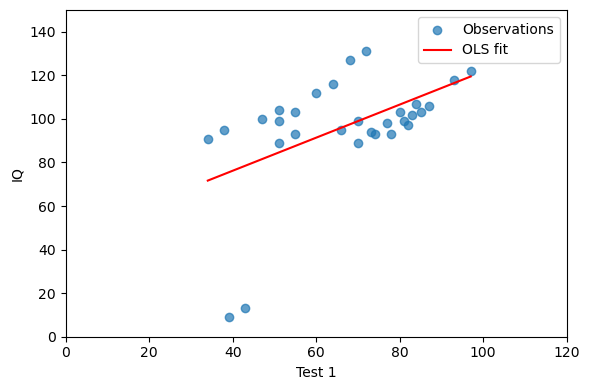

In [6]:
# Scatter plot with OLS line and specified axes
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(X, Y, alpha=0.7, label='Observations')
plt.plot(x_grid, y_hat, color='red', label='OLS fit')
plt.axis([0, 120, 0, 150])
plt.xlabel('Test 1')
plt.ylabel('IQ')
plt.legend()
plt.tight_layout()

Just by looking at the graph, do you believe Test 1 is a good predictor of the final IQ score?